In [60]:
from sklearn.datasets import load_iris
from sklearn import tree

import graphviz

iris = load_iris()

clf = tree.DecisionTreeClassifier()
clf.fit(iris.data, iris.target)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [61]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph.render('iris')

'iris.pdf'

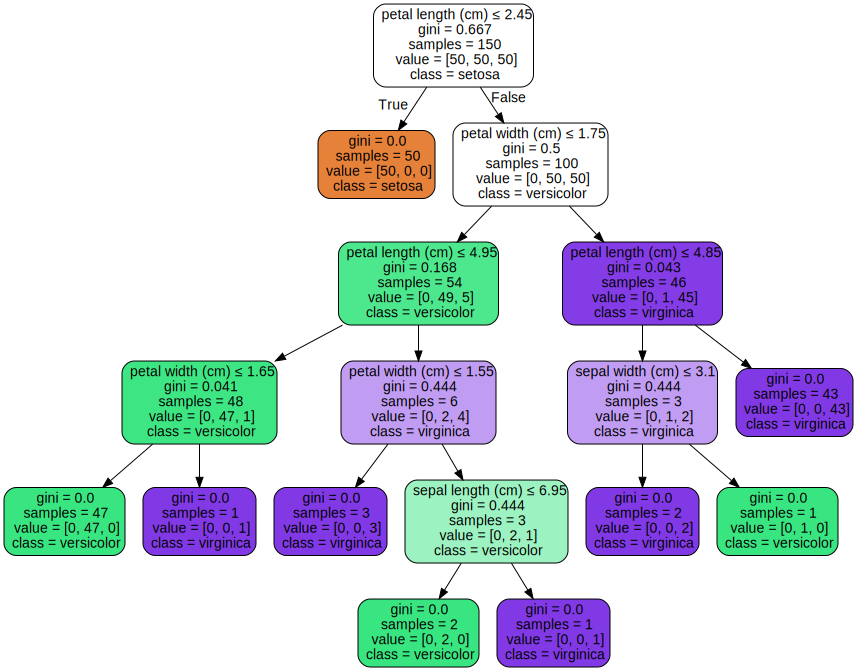

In [62]:
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True) 
graph = graphviz.Source(dot_data)
graph.render('iris_c')
graph

## 分类边界

In [55]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.datasets import load_iris
from sklearn import tree


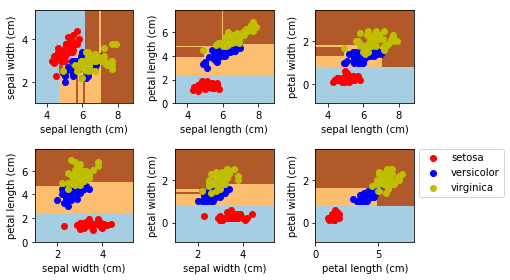

In [57]:
n_classes = 3
plot_step = 0.02
plot_colors = 'rby'
iris = load_iris()

for i, pair in enumerate([[0,1],[0,2],[0,3],[1,2],[1,3],[2,3]]):
    X = iris.data[:, pair]
    y = iris.target
    
    # model training
    clf = tree.DecisionTreeClassifier()
    clf.fit(X, y)
    
    x1_min, x1_max = np.min(X[:, 0]) - 1, np.max(X[:, 0]) + 1
    x2_min, x2_max = np.min(X[:, 1]) - 1, np.max(X[:, 1]) + 1
    
    x1, x2 = np.meshgrid(np.arange(x1_min, x1_max, plot_step), np.arange(x2_min, x2_max, plot_step))
    test_X = np.c_[x1.ravel(), x2.ravel()]
    
    test_y = clf.predict(test_X)
    test_y = test_y.reshape(x1.shape)
    
    plt.subplot(2, 3, i + 1)
    # 可视化
    plt.pcolormesh(x1, x2, test_y, cmap=plt.cm.Paired)
#     plt.contourf(x1, x2, test_y, cmap=plt.cm.Paired)
    
#     plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', edgecolors='k', s=10, label = [iris.target_names])
    
    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(X[idx, 0], X[idx, 1], c=color, label=iris.target_names[i],cmap=plt.cm.Paired)
        
    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])
    plt.tight_layout()
    
# plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show() 
    
    
    